# Lineal Regression model for Medical Cost Personal Dataset

In this notebook, we are going to examine the [Medical Dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance) from kaggle an stablish a lineal regression model to predict charges based onn other features contain in this datased, such as age, gender, bmi and other personal characteristics.




In [68]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
dataset = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
dataset_copy = dataset

We take a look at how the features of this dataset look like.

In [70]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [71]:
len(dataset)

1338

First step when we have a diverse and large dataset like this one, we have to mind two things:

1. Clear the dataset, by examining if there are unknown values that can missdirect our predictions.

2. Adapt the features so our model can predict more efficiently. 

Let's start by checking if we need to `clear the dataset`.

In [72]:
dataset.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

The dataset looks clear as it does not have any NaN values.
We can continue now by `adapting the features`. What does this mean? 

`Region` column for example has categorical (not numerical) values. We can adapt this features using [data encoding](https://www.tensorflow.org/api_docs/python/tf/keras/layers/CategoryEncoding). There are different types of hot encoding, we are going to use one hot encoding.

In [73]:
np.unique(dataset['region'])

array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)

In [74]:
dataset = pd.get_dummies(dataset, columns=['region'], prefix='', prefix_sep='')
dataset.tail()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
1333,50,male,30.97,3,no,10600.5483,0,1,0,0
1334,18,female,31.92,0,no,2205.9808,1,0,0,0
1335,18,female,36.85,0,no,1629.8335,0,0,1,0
1336,21,female,25.80,0,no,2007.9450,0,0,0,1
1337,61,female,29.07,0,yes,29141.3603,0,1,0,0


We confirm that for children we have a integer value so we consider that column of the dataset as full numbers, not a float.

In [75]:
dataset['children']

0       0
1       1
2       3
3       0
4       0
       ..
1333    3
1334    0
1335    0
1336    0
1337    0
Name: children, Length: 1338, dtype: int64

For the `smoker`column, we can turn the string data into boolean data. Same with `sex`, adjusting i.e. female = 0 and male = 1.

In [76]:
dataset['smoker'] = dataset['smoker'].map({'yes': 1, 'no': 0})
dataset['sex'] = dataset['sex'].map( {'male': 1, 'female': 0})
dataset.tail()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
1333,50,1,30.97,3,0,10600.5483,0,1,0,0
1334,18,0,31.92,0,0,2205.9808,1,0,0,0
1335,18,0,36.85,0,0,1629.8335,0,0,1,0
1336,21,0,25.80,0,0,2007.9450,0,0,0,1
1337,61,0,29.07,0,1,29141.3603,0,1,0,0


Now that we have clear de data, we split the data into features and labels and into a train and test dataset.

In [77]:
def Split_dataset(dataset):

    train_dataset = dataset.sample(frac=0.8, random_state=0)
    test_dataset = dataset.drop(train_dataset.index)

    train_features = train_dataset.copy()
    train_labels = train_features.pop('charges')

    test_features = test_dataset.copy()
    test_labels = test_features.pop('charges')

    return train_features,train_labels,test_features,test_labels

train_features,train_labels,test_features,test_labels =  Split_dataset(dataset)


In [78]:
train_features.head()

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
578,52,1,30.200,1,0,0,0,0,1
610,47,0,29.370,1,0,0,0,1,0
569,48,1,40.565,2,1,0,1,0,0
1034,61,1,38.380,0,0,0,1,0,0
198,51,0,18.050,0,0,0,1,0,0


Now we can try to build a simple model

In [79]:
#insurance_model

# Set random seed for weight initialization.
tf.random.set_seed(10)

# 1. Create our model

insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model

insurance_model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=["mae"])

# 3. Fit the model

history = insurance_model.fit(train_features, train_labels, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8974.2383 - mae: 8974.2383
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6603.8018 - mae: 6603.8018
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5249.0576 - mae: 5249.0576
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4273.0112 - mae: 4273.0112
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4212.5864 - mae: 4212.5864
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3987.8108 - mae: 3987.8108
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3873.7864 - mae: 3873.7864
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4552.3145 - mae: 4552.3145
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4291.6118 - mae: 4291.6118
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3451.9253 - mae: 3451.9253
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4250.4805 - mae: 4250.4805
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

loaded_model = tf.keras.models.load_model("saved_models/2_dense_adam_mae_SM.keras")

In [80]:
# Evaluate
insurance_model_1_loss, insurance_model_1_mae =insurance_model.evaluate(test_features, test_labels)
insurance_model_1_loss, insurance_model_1_mae

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3738.5447 - mae: 3738.5447 


(4061.01171875, 4061.01171875)

As we saved our model into the history variable, we can see how its performance changed over time ( over each epoch).

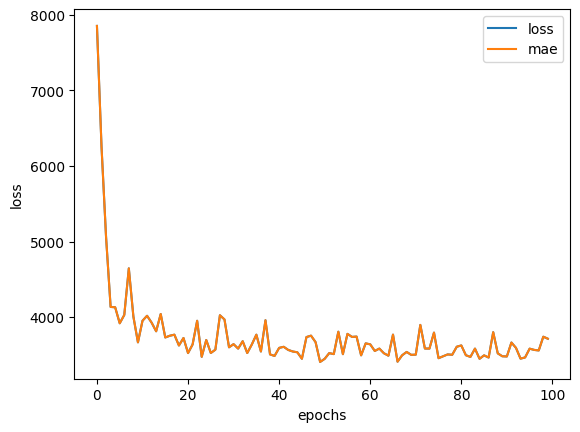

In [81]:
def plot_loss(history):
    pd.DataFrame(history.history).plot()
    plt.ylabel("loss")
    plt.xlabel("epochs");

plot_loss(history)


In [82]:

# Try training for a little longer (100 more epochs)
history_2 = insurance_model.fit(train_features, train_labels, epochs=100, verbose=0)

In [83]:
insurance_model_2_loss, insurance_model_2_mae = insurance_model.evaluate(train_features, train_dataset)
insurance_model_2_loss, insurance_model_2_mae

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11188.3145 - mae: 11188.3145


(10975.4033203125, 10975.4033203125)

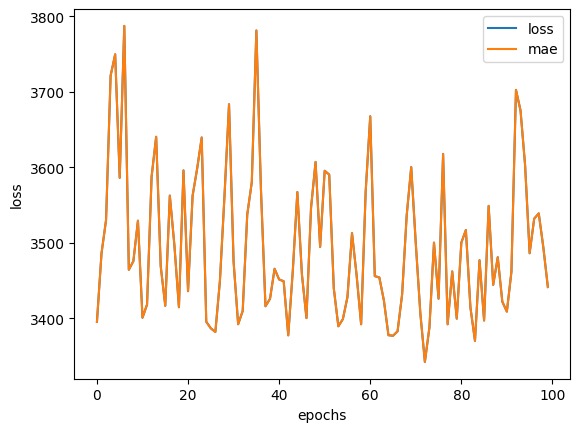

In [84]:
plot_loss(history_2)

There is still some improvements we can think about.

In [85]:
dataset_sklearn = dataset_copy
dataset_sklearn.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [127]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create column transformer to preprocess all the data.
column_transformer = make_column_transformer(
    (MinMaxScaler(), ["age"]),
    (MinMaxScaler(), [ "bmi"]),
    (MinMaxScaler(), ["children"]), # MinMax the values.
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create features and labels
sk_features = dataset_sklearn.drop("charges", axis=1)
sk_labels = dataset_sklearn["charges"]

sk_features.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [ ]:

# Sklearn provides also a split function, just like the one we created before.
train_features_sk, test_features_sk, train_label_sk, test_label_sk = train_test_split(sk_features, sk_labels, test_size=0.2, random_state=10)

# Fit column transformer on the training data
column_transformer.fit(train_features_sk)

# Transform training and test data with MinMaxScaler and one hot encoding.
train_features_normalized = column_transformer.transform(train_features_sk)
test_features_normalized = column_transformer.transform(test_features_sk)

We can take a look on how different we have prepared the data now compared to how we did previously. The main difference we see is that instead of having `sex`and `smoker`as boolean, we have it encoded by hot encoding.

In [131]:
train_features_normalized.shape, train_features.shape

((1070, 11), (1070, 9))

In [132]:
train_features_normalized[0],train_features.loc[0]

(array([0.02173913, 0.52649987, 0.        , 0.        , 1.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ]),
 age          19.0
 sex           0.0
 bmi          27.9
 children      0.0
 smoker        1.0
 northeast     0.0
 northwest     0.0
 southeast     0.0
 southwest     1.0
 Name: 0, dtype: float64)

In [133]:
train_features_normalized[2],train_features.loc[2]

(array([0.        , 0.38081786, 0.        , 1.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        ]),
 age          28.0
 sex           1.0
 bmi          33.0
 children      3.0
 smoker        0.0
 northeast     0.0
 northwest     0.0
 southeast     1.0
 southwest     0.0
 Name: 2, dtype: float64)

Checking the values, there is something that catches my eye that I am not happy about. I can see the hot encoded worked well, but the minmax scaling has not worked independently. For children, we are seeing always 0 value for any kind of number in the dataset. We should see some static values depending on the change, such as in this example ( 0, 0.2, 0.4, 0.6, 0.8)

In [143]:
ct_children = make_column_transformer((MinMaxScaler(),["children"]))

ct_children.fit_transform(sk_features)

sk_children_normalized = ct_children.transform(sk_features)

sk_children_normalized

array([[0. ],
       [0.2],
       [0.6],
       ...,
       [0. ],
       [0. ],
       [0. ]])

Let's try to make this model still with minmax scaler work, applying separate transforms.

In [165]:
sk_features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.00000,39.0,51.00000,64.00
bmi,1338.0,30.663397,6.098187,15.96,26.29625,30.4,34.69375,53.13
children,1338.0,1.094918,1.205493,0.00,0.00000,1.0,2.00000,5.00


In [ ]:
ct_age = make_column_transformer((MinMaxScaler(),["age"]))
ct_bmi = make_column_transformer((MinMaxScaler(),["bmi"]))

ct_age.fit_transform(sk_features)
ct_bmi.fit_transform(sk_features)

sk_age_normalized = ct_age.transform(sk_features)
sk_bmi_normalized = ct_bmi.transform(sk_features)


print("Age with individual minmax",sk_age_normalized[:10].squeeze())
print("Age with individual back transformed",((sk_age_normalized[:10].squeeze()*48)+18))
print("Age with multiple column minmax", train_features_normalized[:11,0])
print("Age with multiple column minmax back transformed", ((train_features_normalized[:11,0]*48)+18))
print("Original age", sk_features['age'][:10].drop)


Age with individual minmax [0.02173913 0.         0.2173913  0.32608696 0.30434783 0.2826087
 0.60869565 0.41304348 0.41304348 0.91304348]
Age with individual back transformed [19.04347826 18.         28.43478261 33.65217391 32.60869565 31.56521739
 47.2173913  37.82608696 37.82608696 61.82608696]
Age with multiple column minmax [0.02173913 0.69565217 0.         0.         0.76086957 0.58695652
 0.52173913 0.15217391 0.13043478 0.13043478 0.65217391]
Age with multiple column minmax back transformed [19.04347826 51.39130435 18.         18.         54.52173913 46.17391304
 43.04347826 25.30434783 24.26086957 24.26086957 49.30434783]
Original age 0    19
1    18
2    28
3    33
4    32
5    31
6    46
7    37
8    37
9    60
Name: age, dtype: int64


We can create another model and try to compare results.

In [90]:
#insurance_model with SK normalization.

# Set random seed for weight initialization.
tf.random.set_seed(10)

# 1. Create our model

insurance_model_sk = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model

insurance_model_sk.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=["mae"])

# 3. Fit the model

history_sk = insurance_model_sk.fit(train_features_normalized, train_label_sk, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 10367.9053 - mae: 10367.9053
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4071.7393 - mae: 4071.7393
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3608.8989 - mae: 3608.8989
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3523.2913 - mae: 3523.2913
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3527.6887 - mae: 3527.6887
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3475.1145 - mae: 3475.1145
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3490.7292 - mae: 3490.7292
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3498.4597 - mae: 3498.4597
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3569.0542 - mae: 3569.0542
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3595.4287 - mae: 3595.4287
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3576.9282 - mae: 3576.9282
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

In [91]:
insurance_model_3_loss, insurance_model_3_mae = insurance_model_sk.evaluate(test_features_normalized, test_label_sk)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3881.7168 - mae: 3881.7168 


In [92]:
insurance_model_2_loss,insurance_model_2_mae

(10975.4033203125, 10975.4033203125)

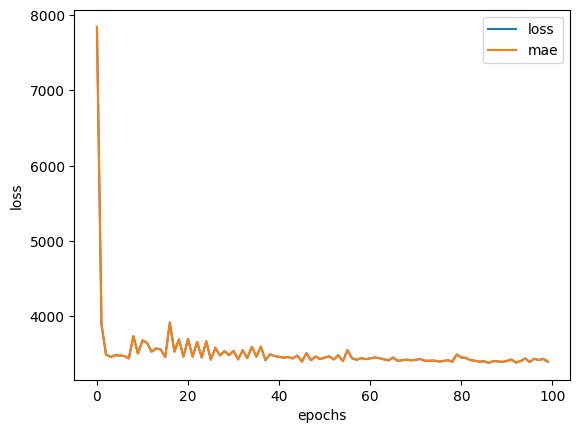

In [93]:
plot_loss(history_sk)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3978.2974 - mae: 3978.2974


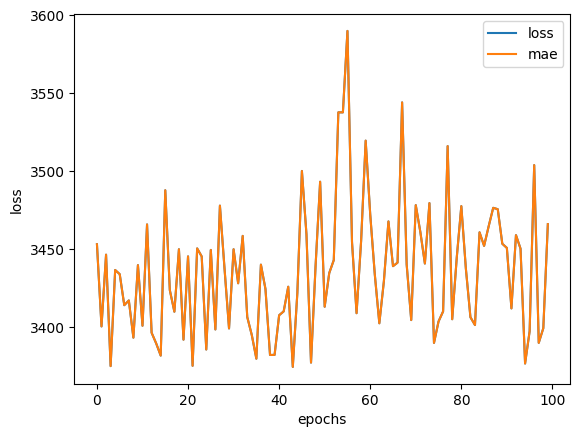

In [94]:
history_sk_2 = insurance_model_sk.fit(train_features_normalized, train_label_sk, epochs=100, verbose=0)

insurance_model_4_loss, insurance_model_4_mae = insurance_model_sk.evaluate(test_features_normalized, test_label_sk)
insurance_model_4_loss, insurance_model_4_mae

plot_loss(history_sk_2)